In [28]:
import json
import pymongo 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
client = pymongo.MongoClient("mongodb://localhost:27017/")

In [30]:
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [31]:
datalake = client["datalake"]

In [32]:
datalake

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'datalake')

In [33]:
datalake.posts.drop()

In [34]:
# Cria a coleção chamada posts
posts = datalake["posts"]

In [35]:
with open('/Users/duda/PythonDSA/Duda/10-Projeto9/2-Projeto9/dados/dataset.json') as file:
    file_data = json.load(file)

In [36]:
file_data[:3]

[{'status': 'public',
  'creationDate': '2017-07-17T20:05:49Z',
  'allowComments': True,
  'title': 'ligula nec sem duis aliquam',
  'description': 'in felis eu sapien cursus vestibulum proin eu mi nulla ac enim in tempor turpis nec euismod scelerisque quam turpis adipiscing lorem vitae mattis nibh ligula nec sem duis aliquam convallis nunc proin at turpis a pede posuere nonummy integer non velit donec diam neque vestibulum eget vulputate ut ultrices vel augue vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae donec pharetra magna vestibulum aliquet ultrices erat tortor sollicitudin mi sit amet lobortis sapien sapien non mi integer ac neque duis bibendum morbi non',
  'tags': 1,
  'Category': 'lifestyle',
  'filteredPicture': False},
 {'status': 'private',
  'creationDate': '2019-01-19T15:45:57Z',
  'allowComments': False,
  'title': 'mus vivamus vestibulum sagittis sapien cum',
  'description': 'nec nisi volutpat eleifend donec ut dolor morbi vel le

In [37]:
# Insere o conteúdo do arquivo json na coleção chamada posts. Cada item do arquivo será um documento.
posts.insert_many(file_data, ordered = False, bypass_document_validation = True)

InsertManyResult([ObjectId('667dfa267f51f7dcd7dc1cf4'), ObjectId('667dfa267f51f7dcd7dc1cf5'), ObjectId('667dfa267f51f7dcd7dc1cf6'), ObjectId('667dfa267f51f7dcd7dc1cf7'), ObjectId('667dfa267f51f7dcd7dc1cf8'), ObjectId('667dfa267f51f7dcd7dc1cf9'), ObjectId('667dfa267f51f7dcd7dc1cfa'), ObjectId('667dfa267f51f7dcd7dc1cfb'), ObjectId('667dfa267f51f7dcd7dc1cfc'), ObjectId('667dfa267f51f7dcd7dc1cfd'), ObjectId('667dfa267f51f7dcd7dc1cfe'), ObjectId('667dfa267f51f7dcd7dc1cff'), ObjectId('667dfa267f51f7dcd7dc1d00'), ObjectId('667dfa267f51f7dcd7dc1d01'), ObjectId('667dfa267f51f7dcd7dc1d02'), ObjectId('667dfa267f51f7dcd7dc1d03'), ObjectId('667dfa267f51f7dcd7dc1d04'), ObjectId('667dfa267f51f7dcd7dc1d05'), ObjectId('667dfa267f51f7dcd7dc1d06'), ObjectId('667dfa267f51f7dcd7dc1d07'), ObjectId('667dfa267f51f7dcd7dc1d08'), ObjectId('667dfa267f51f7dcd7dc1d09'), ObjectId('667dfa267f51f7dcd7dc1d0a'), ObjectId('667dfa267f51f7dcd7dc1d0b'), ObjectId('667dfa267f51f7dcd7dc1d0c'), ObjectId('667dfa267f51f7dcd7dc1d

In [38]:
posts.find_one()

{'_id': ObjectId('667dfa267f51f7dcd7dc1cf4'),
 'status': 'public',
 'creationDate': '2017-07-17T20:05:49Z',
 'allowComments': True,
 'title': 'ligula nec sem duis aliquam',
 'description': 'in felis eu sapien cursus vestibulum proin eu mi nulla ac enim in tempor turpis nec euismod scelerisque quam turpis adipiscing lorem vitae mattis nibh ligula nec sem duis aliquam convallis nunc proin at turpis a pede posuere nonummy integer non velit donec diam neque vestibulum eget vulputate ut ultrices vel augue vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae donec pharetra magna vestibulum aliquet ultrices erat tortor sollicitudin mi sit amet lobortis sapien sapien non mi integer ac neque duis bibendum morbi non',
 'tags': 1,
 'Category': 'lifestyle',
 'filteredPicture': False}

In [39]:
n = posts.estimated_document_count()

In [40]:
n

2000

In [41]:
# Agregação para calcular o número de posts em cada categoria

posts_cat = posts.aggregate([{"$group": {"_id": "$Category", "count": {"$sum": 1}}},
                             {"$sort": {"_id.Category": 1, "count": -1}}])

In [42]:
print(posts_cat)

In [43]:
# Converte o resultado da agregação em um dataframe
pc_df = pd.DataFrame(list(posts_cat))

In [44]:
pc_df.head()

,_id,count
0,arts,311
1,fashion,300
2,lifestyle,294
3,movies,289
4,educational,274


In [45]:
list(pc_df['_id'])

['arts', 'fashion', 'lifestyle', 'movies', 'educational', 'politics', 'sports']

<Axes: ylabel='count'>

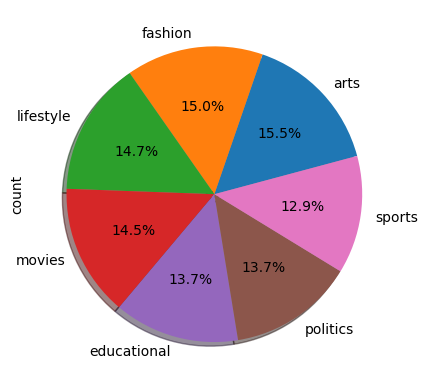

In [46]:
pc_df.plot.pie(y = 'count',
               labels = pc_df['_id'],
               autopct = '%1.1f%%',
               startangle = 15, 
               shadow = True,
               legend = False)

In [47]:
# Número de posts públicos e privados da categoria politics.

pol_sta = posts.aggregate([{"$match": {"Category": "politics"}},
                           {"$group": {"_id": "$status", "count": {"$sum": 1}}}])

In [48]:
ps_df = pd.DataFrame(list(pol_sta))

In [49]:
ps_df

,_id,count
0,public,126
1,private,148


<Axes: title={'center': 'Número de Posts Públicos e Privados'}, xlabel='_id'>

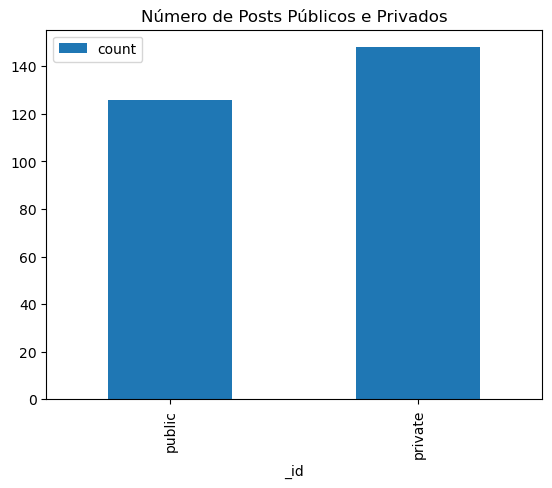

In [50]:
ps_df.plot.bar(x = '_id',
               y = 'count',
               title = "Número de Posts Públicos e Privados")

In [51]:
# Qual ano teve o maior número de posts?

posts.find_one()

{'_id': ObjectId('667dfa267f51f7dcd7dc1cf4'),
 'status': 'public',
 'creationDate': '2017-07-17T20:05:49Z',
 'allowComments': True,
 'title': 'ligula nec sem duis aliquam',
 'description': 'in felis eu sapien cursus vestibulum proin eu mi nulla ac enim in tempor turpis nec euismod scelerisque quam turpis adipiscing lorem vitae mattis nibh ligula nec sem duis aliquam convallis nunc proin at turpis a pede posuere nonummy integer non velit donec diam neque vestibulum eget vulputate ut ultrices vel augue vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae donec pharetra magna vestibulum aliquet ultrices erat tortor sollicitudin mi sit amet lobortis sapien sapien non mi integer ac neque duis bibendum morbi non',
 'tags': 1,
 'Category': 'lifestyle',
 'filteredPicture': False}

In [52]:
# Update many (cria duas noovas variáveis para cada documento)
datalake.posts.update_many({}, {'$set': {"hour": 0}});
datalake.posts.update_many({}, {'$set': {"year": 0}});

In [53]:
posts.find_one()

{'_id': ObjectId('667dfa267f51f7dcd7dc1cf4'),
 'status': 'public',
 'creationDate': '2017-07-17T20:05:49Z',
 'allowComments': True,
 'title': 'ligula nec sem duis aliquam',
 'description': 'in felis eu sapien cursus vestibulum proin eu mi nulla ac enim in tempor turpis nec euismod scelerisque quam turpis adipiscing lorem vitae mattis nibh ligula nec sem duis aliquam convallis nunc proin at turpis a pede posuere nonummy integer non velit donec diam neque vestibulum eget vulputate ut ultrices vel augue vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae donec pharetra magna vestibulum aliquet ultrices erat tortor sollicitudin mi sit amet lobortis sapien sapien non mi integer ac neque duis bibendum morbi non',
 'tags': 1,
 'Category': 'lifestyle',
 'filteredPicture': False,
 'hour': 0,
 'year': 0}

In [54]:
for data in posts.find({}):
    posts.update_one({"_id": data['_id']},
                     {'$set': {'hour' : data['creationDate'].split('T')[1].split(':')[0],
                               'year' : data['creationDate'].split('T')[0].split('-')[0] }})

In [55]:
posts.find_one()

{'_id': ObjectId('667dfa267f51f7dcd7dc1cf4'),
 'status': 'public',
 'creationDate': '2017-07-17T20:05:49Z',
 'allowComments': True,
 'title': 'ligula nec sem duis aliquam',
 'description': 'in felis eu sapien cursus vestibulum proin eu mi nulla ac enim in tempor turpis nec euismod scelerisque quam turpis adipiscing lorem vitae mattis nibh ligula nec sem duis aliquam convallis nunc proin at turpis a pede posuere nonummy integer non velit donec diam neque vestibulum eget vulputate ut ultrices vel augue vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae donec pharetra magna vestibulum aliquet ultrices erat tortor sollicitudin mi sit amet lobortis sapien sapien non mi integer ac neque duis bibendum morbi non',
 'tags': 1,
 'Category': 'lifestyle',
 'filteredPicture': False,
 'hour': '20',
 'year': '2017'}

In [56]:
posts_yr = posts.aggregate([{"$group": {"_id": "$year", "count": {"$sum": 1}}},
                            {"$sort": {"_id.year": 1, "count": 1}}])

In [57]:
py_df = pd.DataFrame(list(posts_yr))
py_df.head()

,_id,count
0,2015,76
1,2016,299
2,2019,303
3,2017,309
4,2021,330


<Axes: title={'center': 'Número de Posts Por Ano'}, xlabel='_id'>

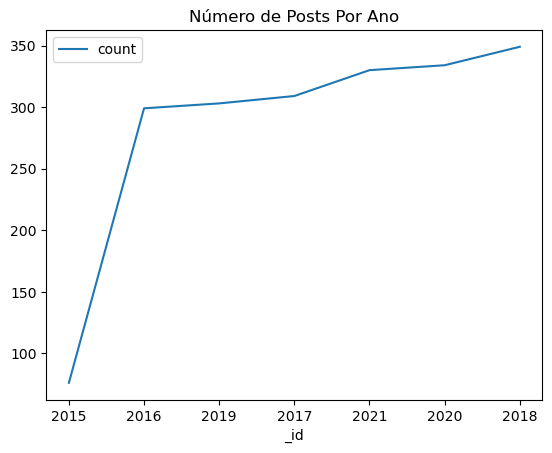

In [58]:
py_df.plot.line(x = '_id',
                y = 'count',
                title = "Número de Posts Por Ano")

In [59]:
# Horario com maior numero de posts

# Agregação e ordenação
posts_hr = posts.aggregate([{"$group": {"_id": "$hour", "count": {"$sum": 1}}},
                            {"$sort": {"_id.hour": 1, "count": -1}}])

In [60]:
for i in range(3):
    print(posts_hr.next())

{'_id': '00', 'count': 103}
{'_id': '08', 'count': 101}
{'_id': '02', 'count': 99}


In [61]:
# Número de posts em hora cheia (terminada por 00) por categoria.

# Filtro, agregação e ordenação
cat_00 = posts.aggregate([{"$match": {"hour": "00"}},
                          {"$group": {"_id": "$Category", "count": {"$sum": 1}}},
                          {"$sort": {"_id.Category": 1, "count": -1}}])

In [62]:
c0_df = pd.DataFrame(list(cat_00))

<Axes: title={'center': 'Número de Posts em Hora Cheia'}, xlabel='_id'>

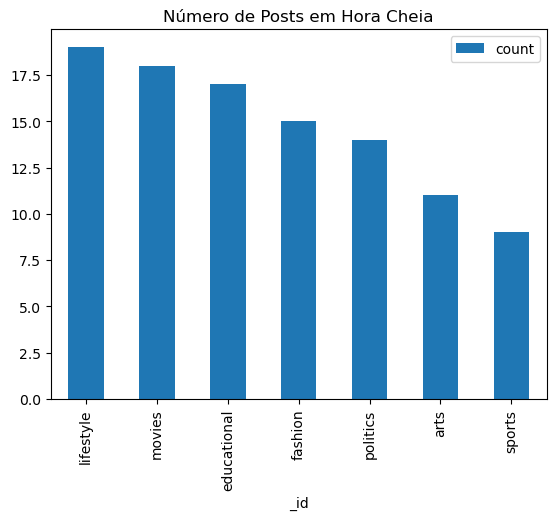

In [63]:
c0_df.plot.bar(x = '_id', y = 'count', title = "Número de Posts em Hora Cheia")

In [64]:
# Número de posts que permitem comentários.

# Count
com = posts.count_documents({'allowComments':True})

In [65]:
print("Número de Posts Que Permitem Comentários:", com)

Número de Posts Que Permitem Comentários: 964


In [66]:
print("Número de Posts Que Não Permitem Comentários:", n-com)

Número de Posts Que Não Permitem Comentários: 1036


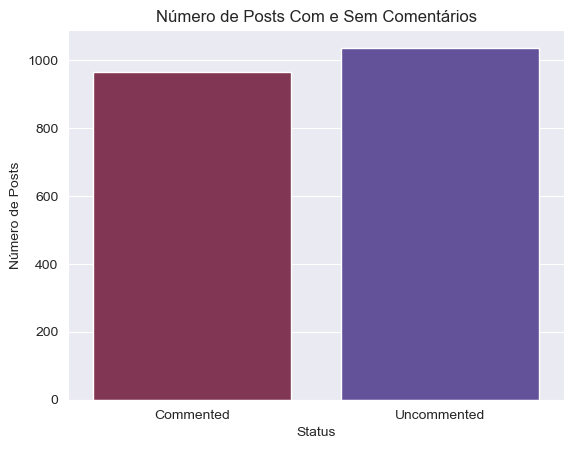

In [67]:
sns.set_style('darkgrid')

x = ['Commented', 'Uncommented']
y = [com, n - com]

sns.barplot(x=x, y=y, palette='twilight_r')
plt.title("Número de Posts Com e Sem Comentários")
plt.xlabel("Status")
plt.ylabel("Número de Posts")
plt.show()

In [68]:
# Comprimento (número de palavras) do título dos posts

posts.find_one()

{'_id': ObjectId('667dfa267f51f7dcd7dc1cf4'),
 'status': 'public',
 'creationDate': '2017-07-17T20:05:49Z',
 'allowComments': True,
 'title': 'ligula nec sem duis aliquam',
 'description': 'in felis eu sapien cursus vestibulum proin eu mi nulla ac enim in tempor turpis nec euismod scelerisque quam turpis adipiscing lorem vitae mattis nibh ligula nec sem duis aliquam convallis nunc proin at turpis a pede posuere nonummy integer non velit donec diam neque vestibulum eget vulputate ut ultrices vel augue vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae donec pharetra magna vestibulum aliquet ultrices erat tortor sollicitudin mi sit amet lobortis sapien sapien non mi integer ac neque duis bibendum morbi non',
 'tags': 1,
 'Category': 'lifestyle',
 'filteredPicture': False,
 'hour': '20',
 'year': '2017'}

In [69]:
# Cria uma nova coluna
datalake.posts.update_many({}, {'$set': {"length_of_heading": 0}});

In [70]:
# Loop para preencher a nova coluna
for data in posts.find({}):
    posts.update_one({"_id": data['_id']},
                     {'$set': {'length_of_heading' : len(data['title'].split(' '))}})

In [71]:
# Agrupamento e ordenação
len_titles = posts.aggregate([{"$group": {"_id": "$length_of_heading", "count": {"$sum": 1}}},
                              {"$sort": {"_id.length_of_heading": 1, "count": -1}}])

In [72]:
len_titles 

In [73]:
title_df = pd.DataFrame(list(len_titles))
title_df.head(10)

,_id,count
0,3,355
1,4,345
2,1,343
3,5,337
4,6,336
5,2,284


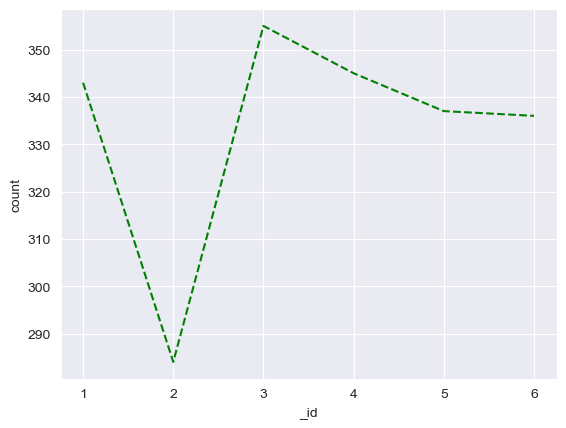

In [74]:
ax = sns.lineplot(x = '_id', y = 'count', data = title_df, color = 'green')
ax.lines[0].set_linestyle("--")
plt.show()

In [75]:
# Número de tags por categoria de posts

# Agregação
tags = posts.aggregate([{"$group": {"_id": "$tags", "count": {"$sum": 1}}},
                        {"$sort": {"_id.tags": 1, "count": -1}}])

In [76]:
cat_tags = posts.find({'tags': {'$gt':0}}, {'Category':1})
cat_tags

In [77]:
# Categorias com posts com maior número de tags, sendo o número de tags maior do que zero
cat_tags = posts.aggregate([{"$match": {"tags": {"$gt":0}}},
                            {"$group": {"_id": "$Category", "count": {"$sum": 1}}},
                            {"$sort": {"_id.tags": 1, "count": -1}}])

In [78]:
ct_df = pd.DataFrame(list(cat_tags))
ct_df

,_id,count
0,arts,276
1,fashion,276
2,movies,264
3,lifestyle,262
4,politics,258
5,educational,255
6,sports,235


<Axes: xlabel='_id', ylabel='count'>

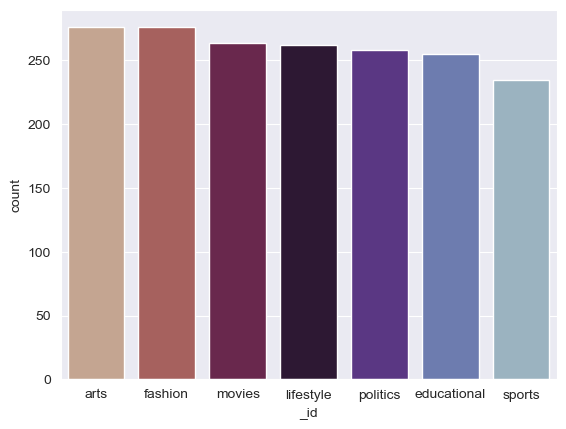

In [79]:
sns.barplot(x = '_id', y = 'count', data = ct_df, palette = 'twilight_r')

In [80]:
# Qual categoria usa mais filtros de fotos/imagens?


# Filtro, agregação e ordenação
cat_fs = posts.aggregate([{"$match": {"filteredPicture": True}},
                          {"$group":{"_id": "$Category", "count": {"$sum": 1}}},
                          {"$sort": {"_id.tags": 1, "count": -1}}])

In [81]:
for i in range(7):
    print(cat_fs.next())

{'_id': 'fashion', 'count': 159}
{'_id': 'movies', 'count': 154}
{'_id': 'arts', 'count': 146}
{'_id': 'lifestyle', 'count': 136}
{'_id': 'educational', 'count': 135}
{'_id': 'politics', 'count': 131}
{'_id': 'sports', 'count': 117}


In [82]:
# Qual categoria tem posts (descrição) mais longos (com maior número de palavras), acima de 60 caracteres?

# Cria a variável
datalake.posts.update_many({}, {'$set': {"length_of_des": 0}});

In [83]:
# Loop para preencher a variável
for data in posts.find({}):
    posts.update_one({"_id": data['_id']}, {'$set': {'length_of_des': len(data['description'].split(' '))}})

In [84]:
# Filtro, agregação e ordenação
cat_des = posts.aggregate([{"$match": {"length_of_des": {"$gte":60}}},
                           {"$group":{"_id": "$Category", "count": {"$sum": 1}}},
                           {"$sort": {"_id.tags": 1, "count": -1}}])

In [85]:
for i in range(7):
    print(cat_des.next())

{'_id': 'arts', 'count': 178}
{'_id': 'fashion', 'count': 161}
{'_id': 'movies', 'count': 159}
{'_id': 'educational', 'count': 156}
{'_id': 'lifestyle', 'count': 156}
{'_id': 'politics', 'count': 146}
{'_id': 'sports', 'count': 130}


In [86]:
# O número de posts (descrição) varia de acordo com a hora do dia? Aumenta ou diminui?

# Agregação e ordenação por hora e categoria
posts_hr = posts.aggregate([{"$group": {"_id": ["$hour", "$Category"], "count": {"$sum": 1}}},
                            {"$sort": {"_id.hour": 1, "count": -1}}])

In [87]:
postshr_df = pd.DataFrame(posts_hr)
postshr_df

,_id,count
0,"[11, arts]",23
1,"[08, politics]",21
2,"[16, lifestyle]",20
3,"[11, educational]",20
4,"[02, lifestyle]",19
...,...,...
163,"[06, sports]",5
164,"[22, politics]",5
165,"[13, sports]",5
166,"[11, lifestyle]",4


In [88]:
# Split
split_df = pd.DataFrame(postshr_df ['_id'].to_list(), columns = ['hour', 'category'])
split_df

,hour,category
0,11,arts
1,08,politics
2,16,lifestyle
3,11,educational
4,02,lifestyle
...,...,...
163,06,sports
164,22,politics
165,13,sports
166,11,lifestyle


In [89]:
df = pd.concat([split_df, postshr_df['count']], axis = 1)
df

,hour,category,count
0,11,arts,23
1,08,politics,21
2,16,lifestyle,20
3,11,educational,20
4,02,lifestyle,19
...,...,...,...
163,06,sports,5
164,22,politics,5
165,13,sports,5
166,11,lifestyle,4


In [90]:
df.head(10)

,hour,category,count
0,11,arts,23
1,08,politics,21
2,16,lifestyle,20
3,11,educational,20
4,02,lifestyle,19
5,10,fashion,19
6,05,arts,19
7,00,lifestyle,19
8,13,fashion,18
9,08,movies,18


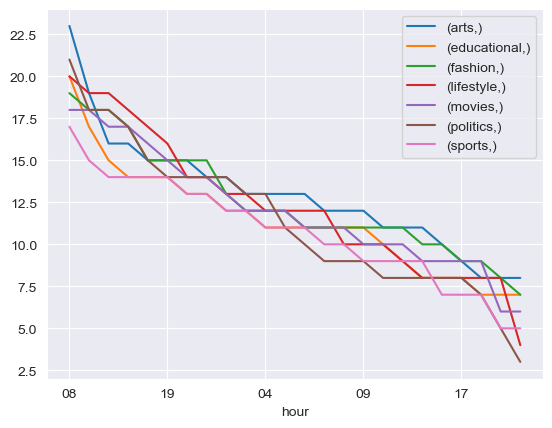

In [91]:
fig, ax = plt.subplots()
for key, grp in df.groupby(['category']):
    ax = grp.plot(ax = ax, kind = 'line', x = 'hour', y = 'count', label = key)

plt.legend(loc = 'best')
plt.show()